## Telco Customer Churn Dataset

This dataset provides information about Telco customers and their attributes. Each row represents a customer, and the columns include various metadata about the customers.

### Columns:

- **Churn:** Indicates whether the customer left within the last month.
- **Services:** Details about the services each customer has signed up for, including phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- **Customer Account Information:** Includes the duration of their customer relationship, contract details, payment method, paperless billing, monthly charges, and total charges.
- **Demographic Information:** Includes gender, age range, and information about whether they have partners and dependents.

### [Dataset Link](https://www.kaggle.com/blastchar/telco-customer-churn)

Explore the dataset to gain insights into customer behavior, service usage, and factors influencing churn. It's a valuable resource for anyone working on customer analytics, predictive modeling, or related projects.


## we want to answer some questions such as :
### what kind of people left within the last month?
### what is the reason for lefting the company within the last month?

<a id='wrangling'></a>
## Data Wrangling


**let's read the data and take some intuition about it**

In [4]:
# import the important libraries
import pandas as pd     # for dataframe
import numpy as np      # for arraies
import matplotlib.pyplot as plt  # for visualization 
%matplotlib inline
import seaborn as sns           # for visualization 

In [5]:
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
telco['TotalCharges'] = telco['TotalCharges'].replace(" ",np.nan)

In [9]:
telco.isna().sum() # number of missing values for each columns

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
telco.dropna(axis=0,inplace=True)

In [11]:
#Converting type of TotalCharges to float
telco["TotalCharges"] = telco["TotalCharges"].astype(float)
telco["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

**we can see that the data don't have missing value**

In [12]:
telco.describe() # to know some statistical information about the numerical data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
telco.shape

(7032, 21)

In [14]:
telco.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [15]:
telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
telco.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

**Now we can say about this data:
We have two genders of clients. Some clients are still dependent, others are independent. and some have a partner.
Customers who have available phone service have some features and advantages**.


<a id='eda'></a>
## Exploratory Data Analysis


### now let's make  Exploratory Data Analysis!

In [53]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## what is the percentage for each gender which left the company?

In [66]:
telco['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

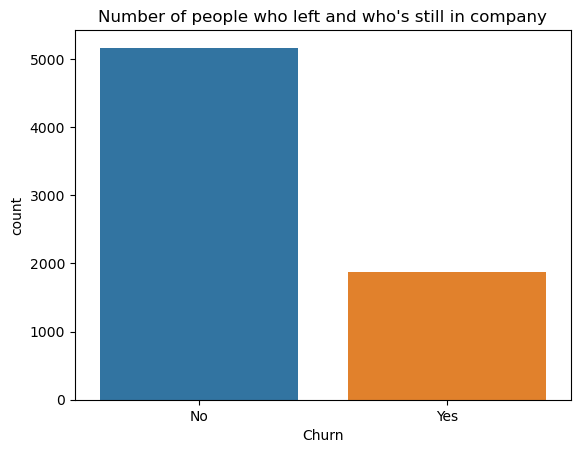

In [20]:
sns.countplot( data =telco,x=telco.Churn)
plt.title("Number of people who left and who's still in company")
plt.show()

In [74]:
len(telco[(telco['Churn']=='No') & (telco['gender']=='Female')])

2544

In [76]:
len(telco[(telco['Churn']=='Yes') & (telco['gender']=='Male')])

930

In [75]:
len(telco[(telco['Churn']=='No') & (telco['gender']=='Male')])

2619

In [77]:
len(telco[(telco['Churn']=='Yes') & (telco['gender']=='Female')])

939

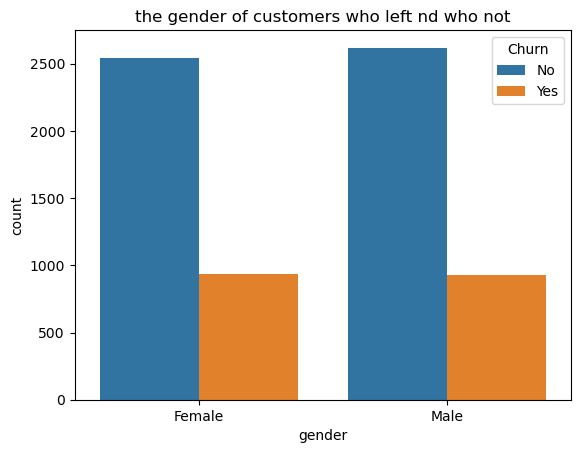

In [78]:
sns.countplot(x=telco.gender,hue=telco.Churn,data=telco)
plt.title('the gender of customers who left nd who not')
plt.show()

In [79]:
# return rows with  "gender == 'Female' and Churn == 'Yes'" only
female_left = telco.query("gender == 'Female' and Churn == 'Yes'")

In [81]:
female_left

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,1980-KXVPM,Female,1,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.05,256.25,Yes
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7011,5482-NUPNA,Female,0,No,No,4,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


In [80]:
female_left.shape

(939, 21)

In [82]:
male_left = telco.query("gender == 'Male' and Churn == 'Yes'")

In [83]:
male_left.shape

(930, 21)

In [90]:
print('the percentage of female who left is {}%'.format((939/1869)*100))

the percentage of female who left is 50.24077046548957%


In [91]:
print('the percentage of male who left is {}%'.format((930/1869)*100))

the percentage of male who left is 49.75922953451043%


### we can say that the gender almost didn't affect on Churn

## let's think about other kind of people

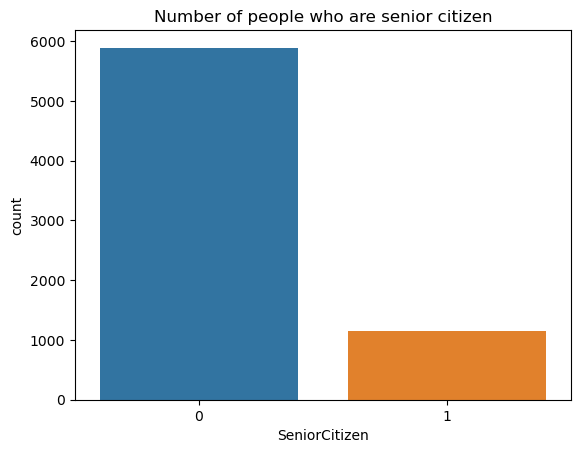

In [92]:
sns.countplot(x=telco.SeniorCitizen,data=telco)
plt.title("Number of people who are senior citizen")
plt.show()

In [93]:
telco.SeniorCitizen.value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

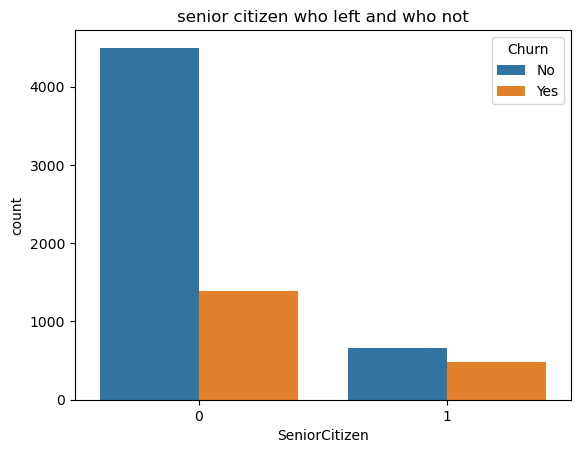

In [94]:
sns.countplot(x=telco.SeniorCitizen,hue=telco.Churn,data=telco)
plt.title('senior citizen who left and who not')
plt.show()

In [98]:
senior_left =telco.query("SeniorCitizen == 1 and Churn == 'Yes'")

In [99]:
senior_left.shape

(476, 21)

In [97]:
print('the percentage of senior citizen who left is {}%'.format((476/1142)*100))

the percentage of senior citizen who left is 41.68126094570928%


### there is a problem!
**41.7% from senior citizen left the company; which it mean that the company didn't provide a suitable service to them**

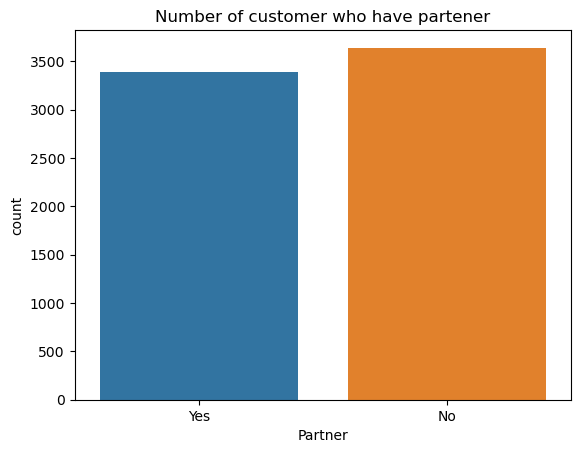

In [101]:
sns.countplot(x=telco.Partner,data=telco)
plt.title("Number of customer who have partener")
plt.show()

In [102]:
telco.Partner.value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

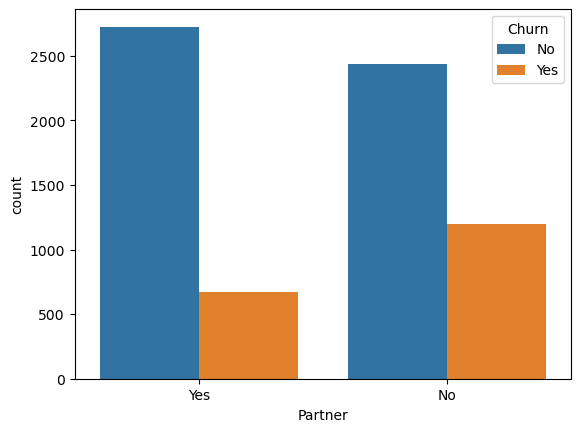

In [104]:
sns.countplot(x=telco.Partner,hue=telco.Churn,data=telco)
plt.show()

In [105]:
partner_left = telco.query("Partner == 'Yes' and Churn == 'Yes'")

In [106]:
partner_left.shape

(669, 21)

In [107]:
telco.query("Partner == 'No' and Churn == 'Yes'").shape

(1200, 21)

In [109]:
print("there are {}% of customers who have partner left the company - \nand there are {}% of customers who din't have partner left"
     .format((669/3402)*100,(1200/3641)*100))

there are 19.66490299823633% of customers who have partner left the company - 
and there are 32.95797857731392% of customers who din't have partner left


# there is another problem: 33% of customers who don't have partner left the company.
**which it mean that; the company didn't provide a suitable service to them**

## let's discover the last kind of customer who is dependant and who is not

In [110]:
telco.Dependents.value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

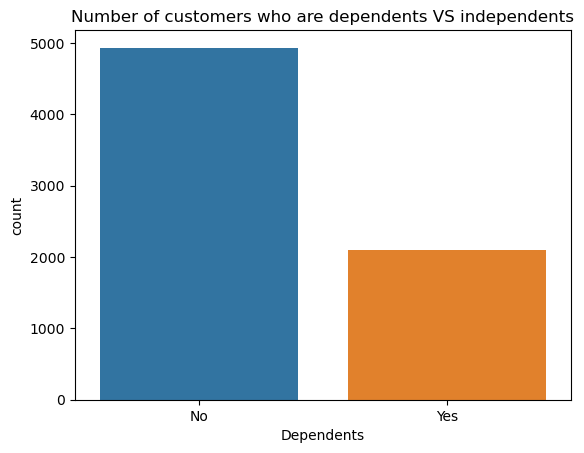

In [111]:
sns.countplot(x=telco.Dependents,data=telco)
plt.title('Number of customers who are dependents VS independents')
plt.show()

**let's see who are left the company**

In [112]:
telco.query("Dependents == 'Yes' and Churn == 'Yes'").shape

(326, 21)

In [113]:
telco.query("Dependents == 'No' and Churn == 'Yes'").shape

(1543, 21)

In [114]:
print("there are {}% of customers who are Dependents left the company \n- and there are {}% of customers who are independents left"
     .format((326/2110)*100,(1543/4933)*100))

there are 15.450236966824646% of customers who are Dependents left the company 
- and there are 31.279140482465028% of customers who are independents left


### that is expected thing, the number of independents  customers who left the company is 31% which is greater than the number of dependent customer who left the company which is 15.4%, because they want to save money

# now we are put our hand on some  problems which are :

- 41.7% from senior citizen left the company.
- 33% of customers who don't have partner left the company.
- 31% of independent customers left the company


# It's time to find the reasons for those problems

In [115]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
telco.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

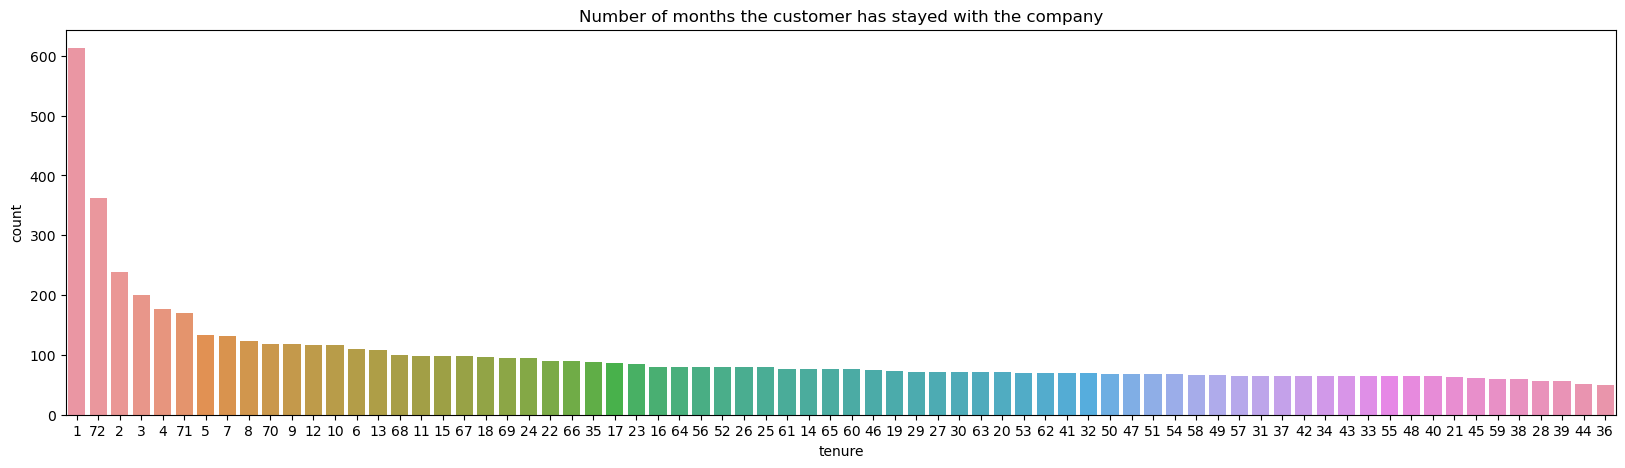

In [120]:
plt.figure(figsize=(20,5))
sns.countplot(x=telco.tenure,data=telco,order=(telco.tenure.value_counts().index))
plt.title('Number of months the customer has stayed with the company')
plt.show()

In [125]:
telco.shape[0]

7032

In [121]:
print('there are {}% of customers left the company after the first month'.format((telco.query("tenure ==1").shape[0]/telco.shape[0])*100))

there are 8.717292377701934% of customers left the company after the first month


In [127]:
print('in general {}% of customers left the company after first 5 months'
      .format((telco.query("tenure ==[1,2,3,4,5]").shape[0]/telco.shape[0])*100))

in general 19.340159271899886% of customers left the company after first 5 months


**select numerical features**

In [128]:
num_col = telco[['tenure','MonthlyCharges','TotalCharges']]

In [129]:
num_col.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


<a id='visualization'></a>
# Visualization

In [130]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
telco.shape

(7032, 21)

### What is the structure of your dataset?

**The data have 7032 rows and 21 columns**

### What is/are the main feature(s) of interest in your dataset?

         
[gender             
SeniorCitizen      
Partner            
Dependents         
tenure             
PhoneService       
MultipleLines      
InternetService    
OnlineSecurity     
OnlineBackup       
DeviceProtection   
TechSupport        
StreamingTV        
StreamingMovies    
Contract           
PaperlessBilling   
PaymentMethod      
MonthlyCharges    
TotalCharges      
Churn]

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**until now I feel all feature will help me**

## Univariate Exploration

In [132]:
df=telco.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**profiling our clients**

In [150]:
def pie(x):
    sorted_counts = df[x].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
            counterclock = False,autopct='%.1f%%',shadow=True);
    plt.axis('square')
    plt.show()

In [137]:
df['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [138]:
df['gender'].value_counts().index

Index(['Male', 'Female'], dtype='object', name='gender')

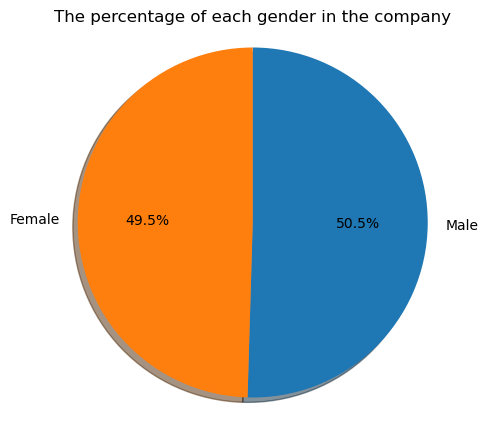

In [151]:
plt.figure(figsize=(5,5))
plt.title('The percentage of each gender in the company')
pie('gender')
plt.show()

**The company has an approximately equal number of genders**

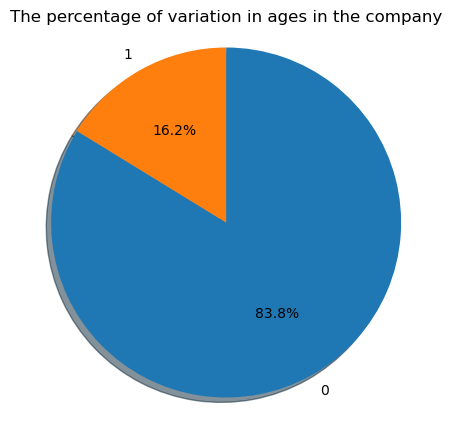

In [153]:
plt.figure(figsize=(5,5))
plt.title('The percentage of variation in ages in the company')
pie('SeniorCitizen')
plt.show()

**16.2% of the company's clients are elderly and the rest are young**

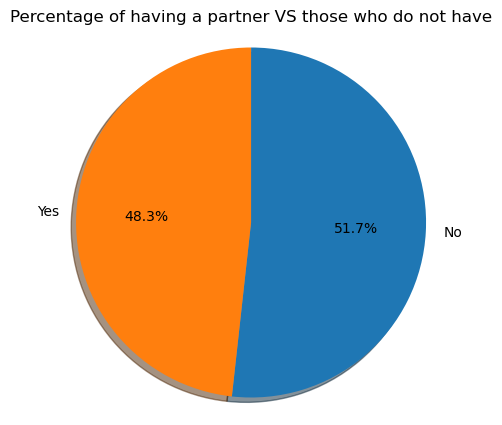

In [154]:
plt.figure(figsize=(5,5))
plt.title('Percentage of having a partner VS those who do not have')
pie('Partner')
plt.show()

**51% of clients don't have a partner**

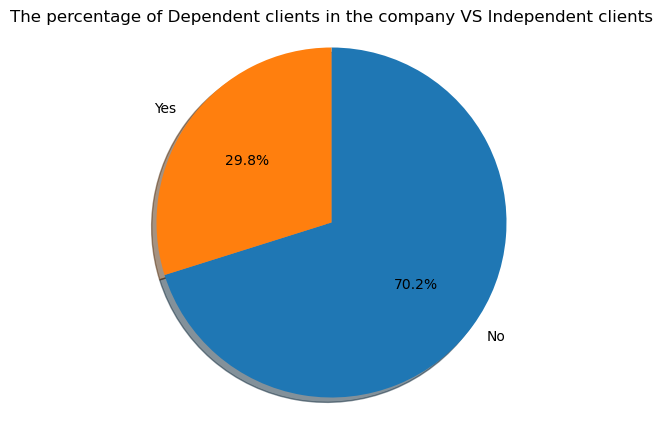

In [155]:
plt.figure(figsize=(5,5))
plt.title('The percentage of Dependent clients in the company VS Independent clients')
pie('Dependents')
plt.show()

**we can see 70.2% of clints are Independent**

In [156]:
num_col.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


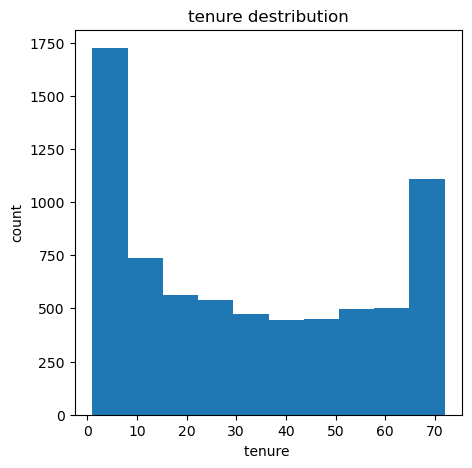

In [159]:
plt.figure(figsize=(5,5))
plt.hist(num_col.tenure)
plt.title('tenure destribution')
plt.xlabel('tenure ')
plt.ylabel('count')
plt.show()

**we can't gain many information from this values so I will try to count the logarithm to it and make a distribution again**

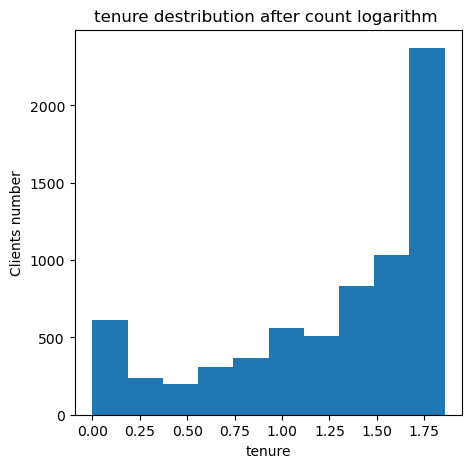

In [160]:
plt.figure(figsize=(5,5))
plt.hist(np.log10(num_col.tenure)) # here i count the logarithm 10 for the tenure feature
plt.title('tenure destribution after count logarithm ')
plt.xlabel('tenure')
plt.ylabel('Clients number')
plt.show()

**We can see now that the longer the tenure, the greater the number of clients**

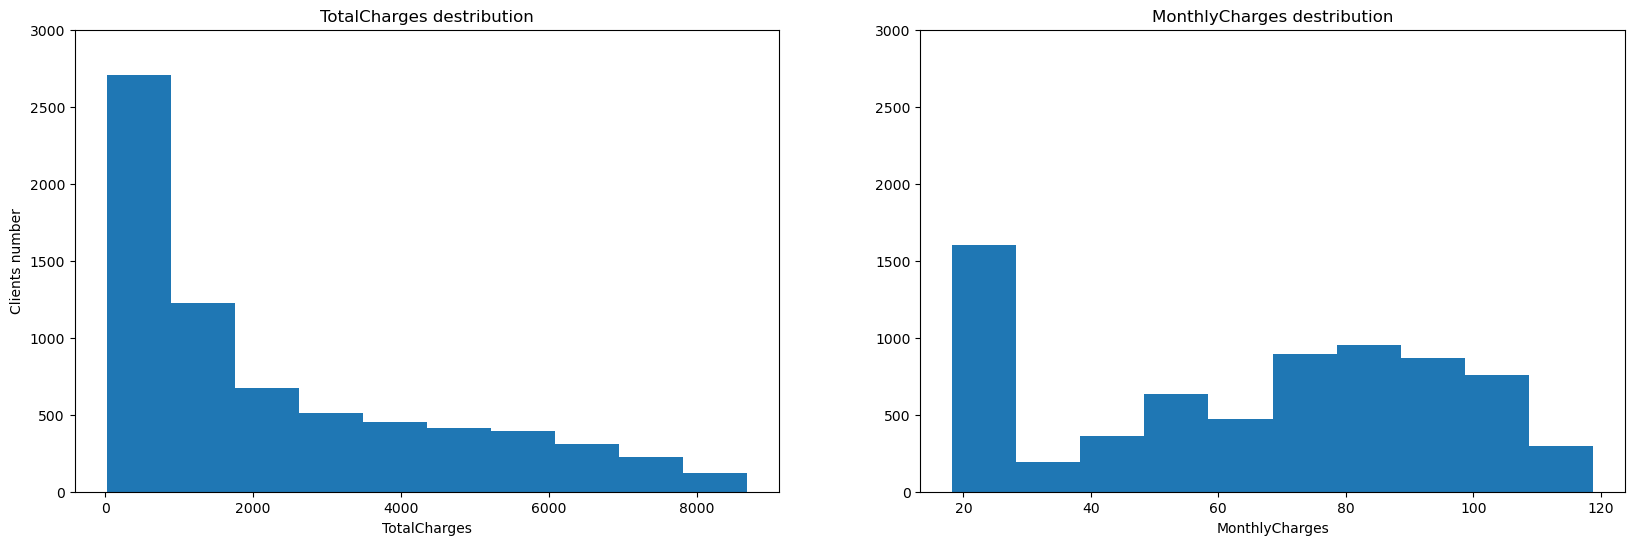

In [161]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.hist(num_col.TotalCharges)
plt.ylim(0,3000)
plt.title('TotalCharges destribution')
plt.xlabel('TotalCharges')
plt.ylabel('Clients number')

plt.subplot(1,2,2)
plt.hist(num_col.MonthlyCharges)
plt.ylim(0,3000)
plt.title('MonthlyCharges destribution')
plt.xlabel('MonthlyCharges')
plt.show()

**For Total Charges, the largest number of customers pays a value between 0 and 2000, after which the number of clients decreases dramatically**

**For monthly Charges, there is a variation in the number of customers, but it increases between 20 and 25**

In [163]:
num_col

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


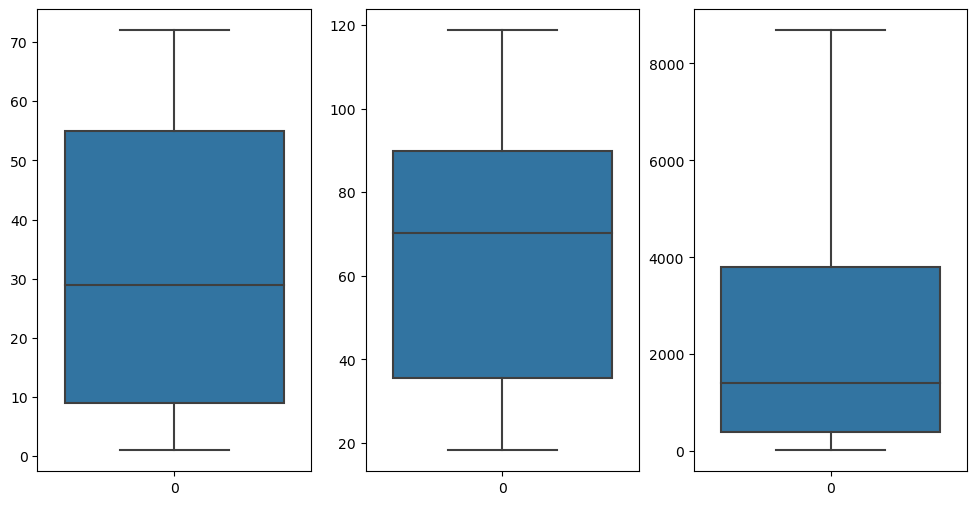

In [162]:
plt.figure(figsize=(12,6))


for i in range(len(list(num_col.columns))):
    plt.subplot(1,3,i+1)
    sns.boxplot(num_col.iloc[:,i])

**there are no outliers**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **For the tenure feature the distribution was not good to observe something so I calculate the logarithm to see the distribution accurately**



## Bivariate Exploration

In [164]:
service = telco.iloc[:,6:-4]

In [165]:
service.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes


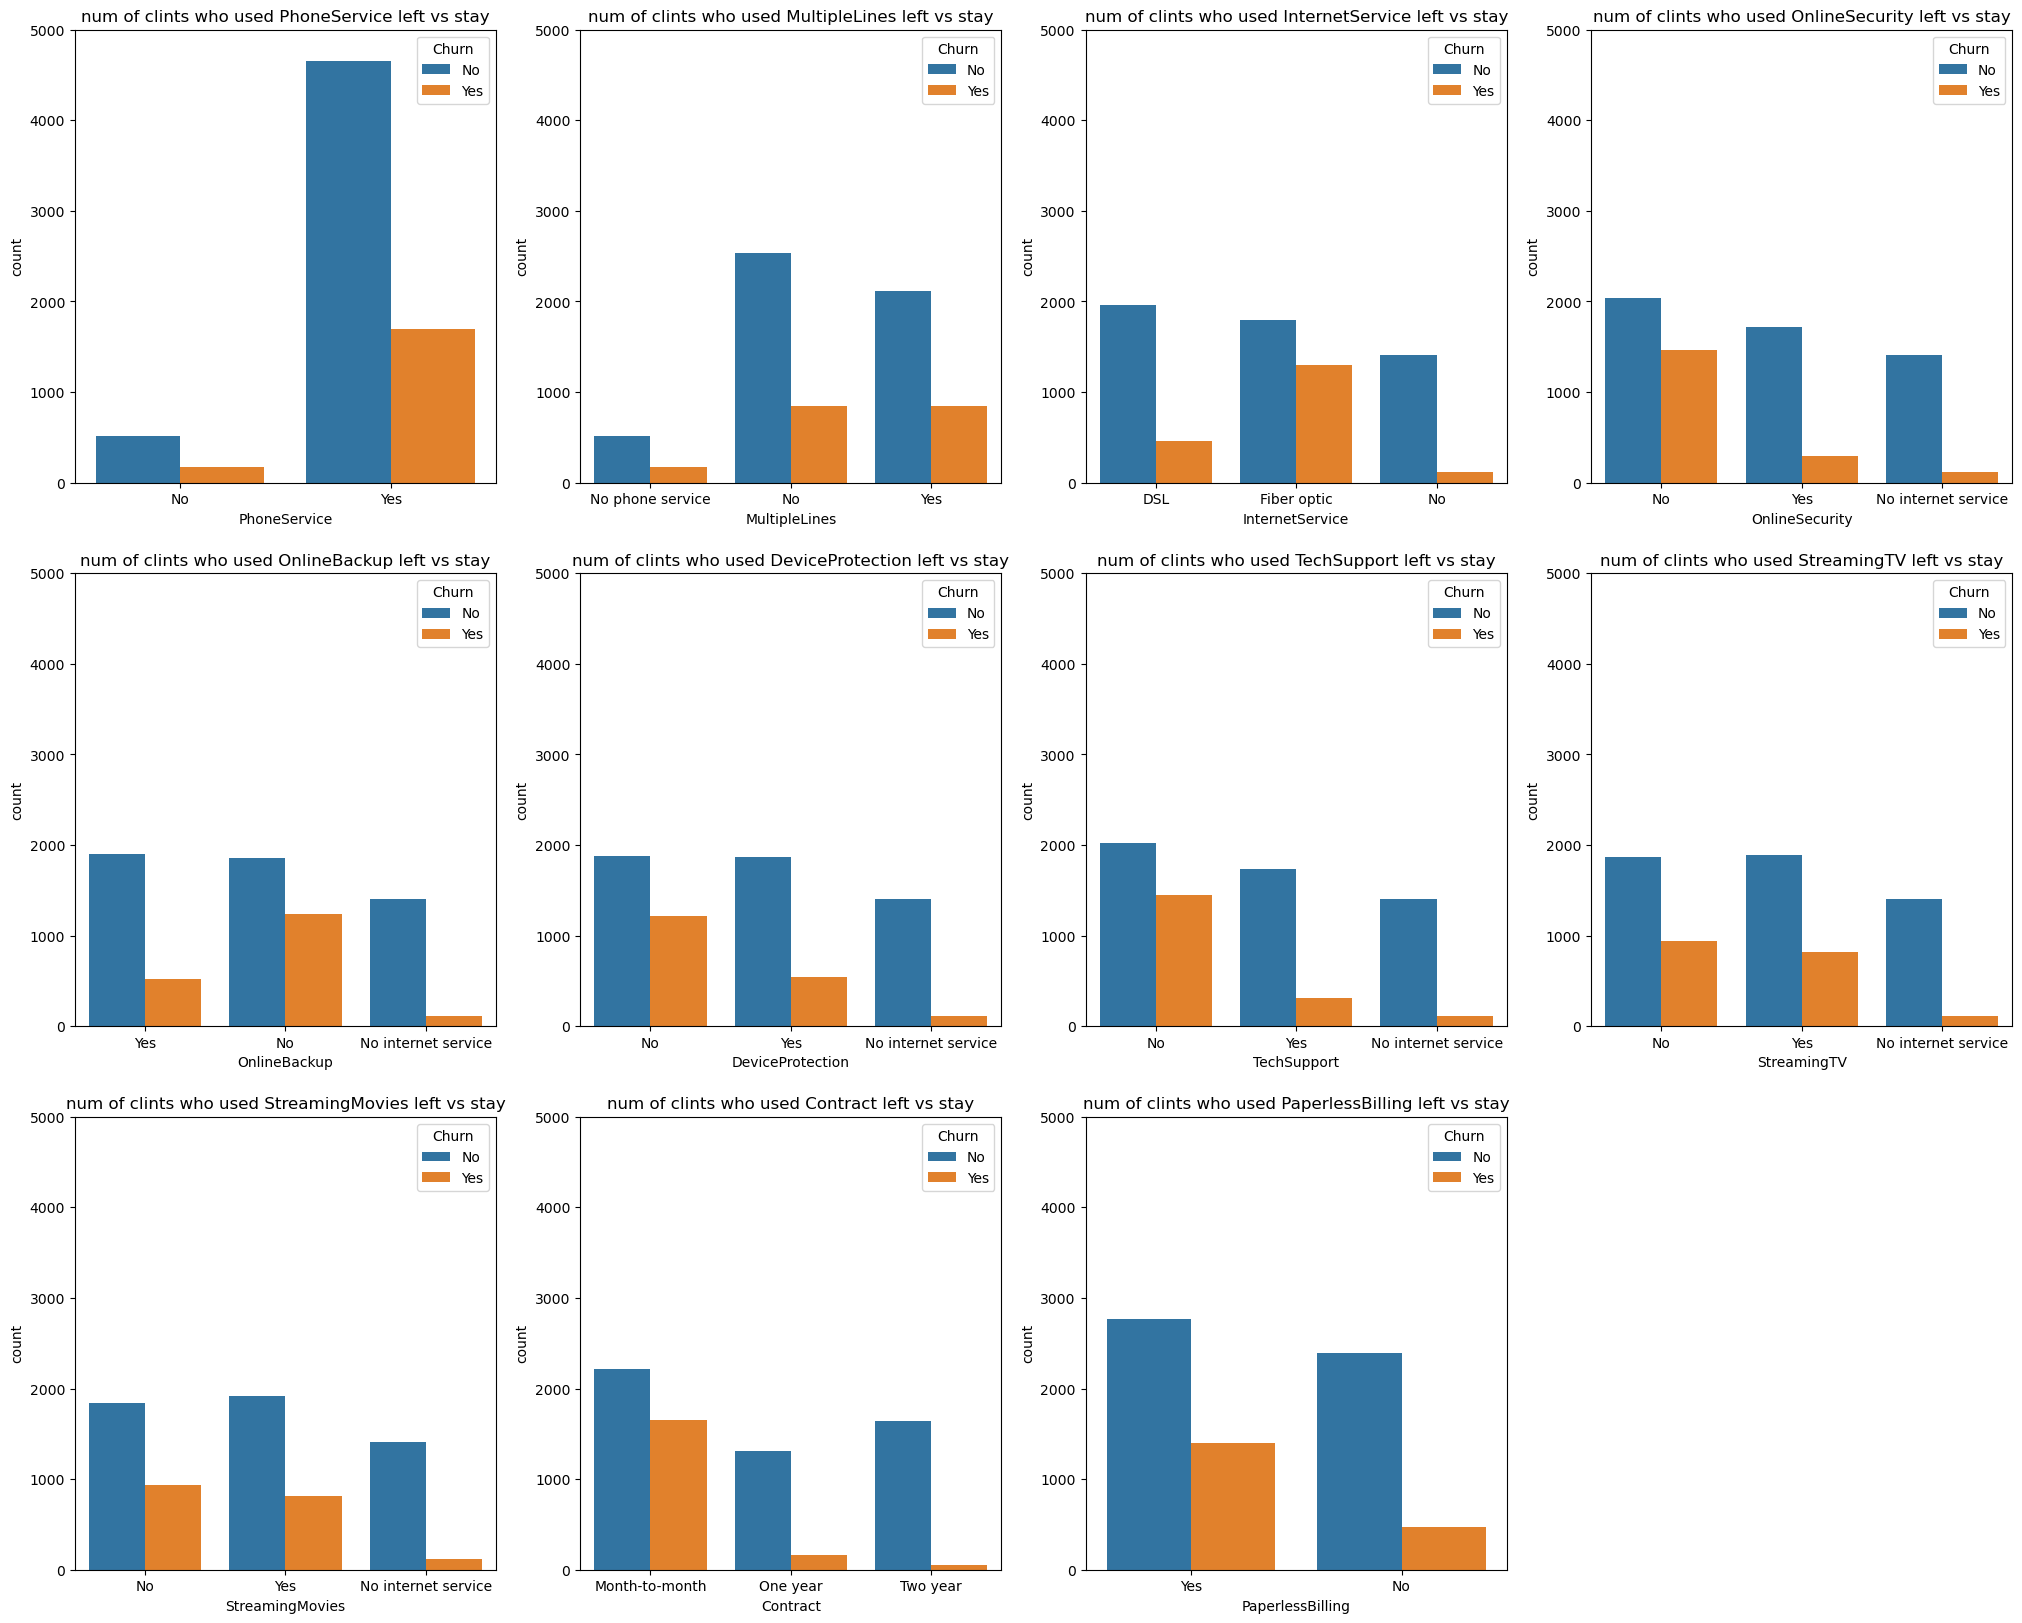

In [167]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(x=feature,hue = telco.Churn,data=telco)
    plt.ylim(0,5000)
    plt.title('num of clints who used {} left vs stay'.format(feature))
plt.show()

### The previous graph shows the relationship of leaving the company with services, and knowing the number of those who left the company and who remained in relation to using the services

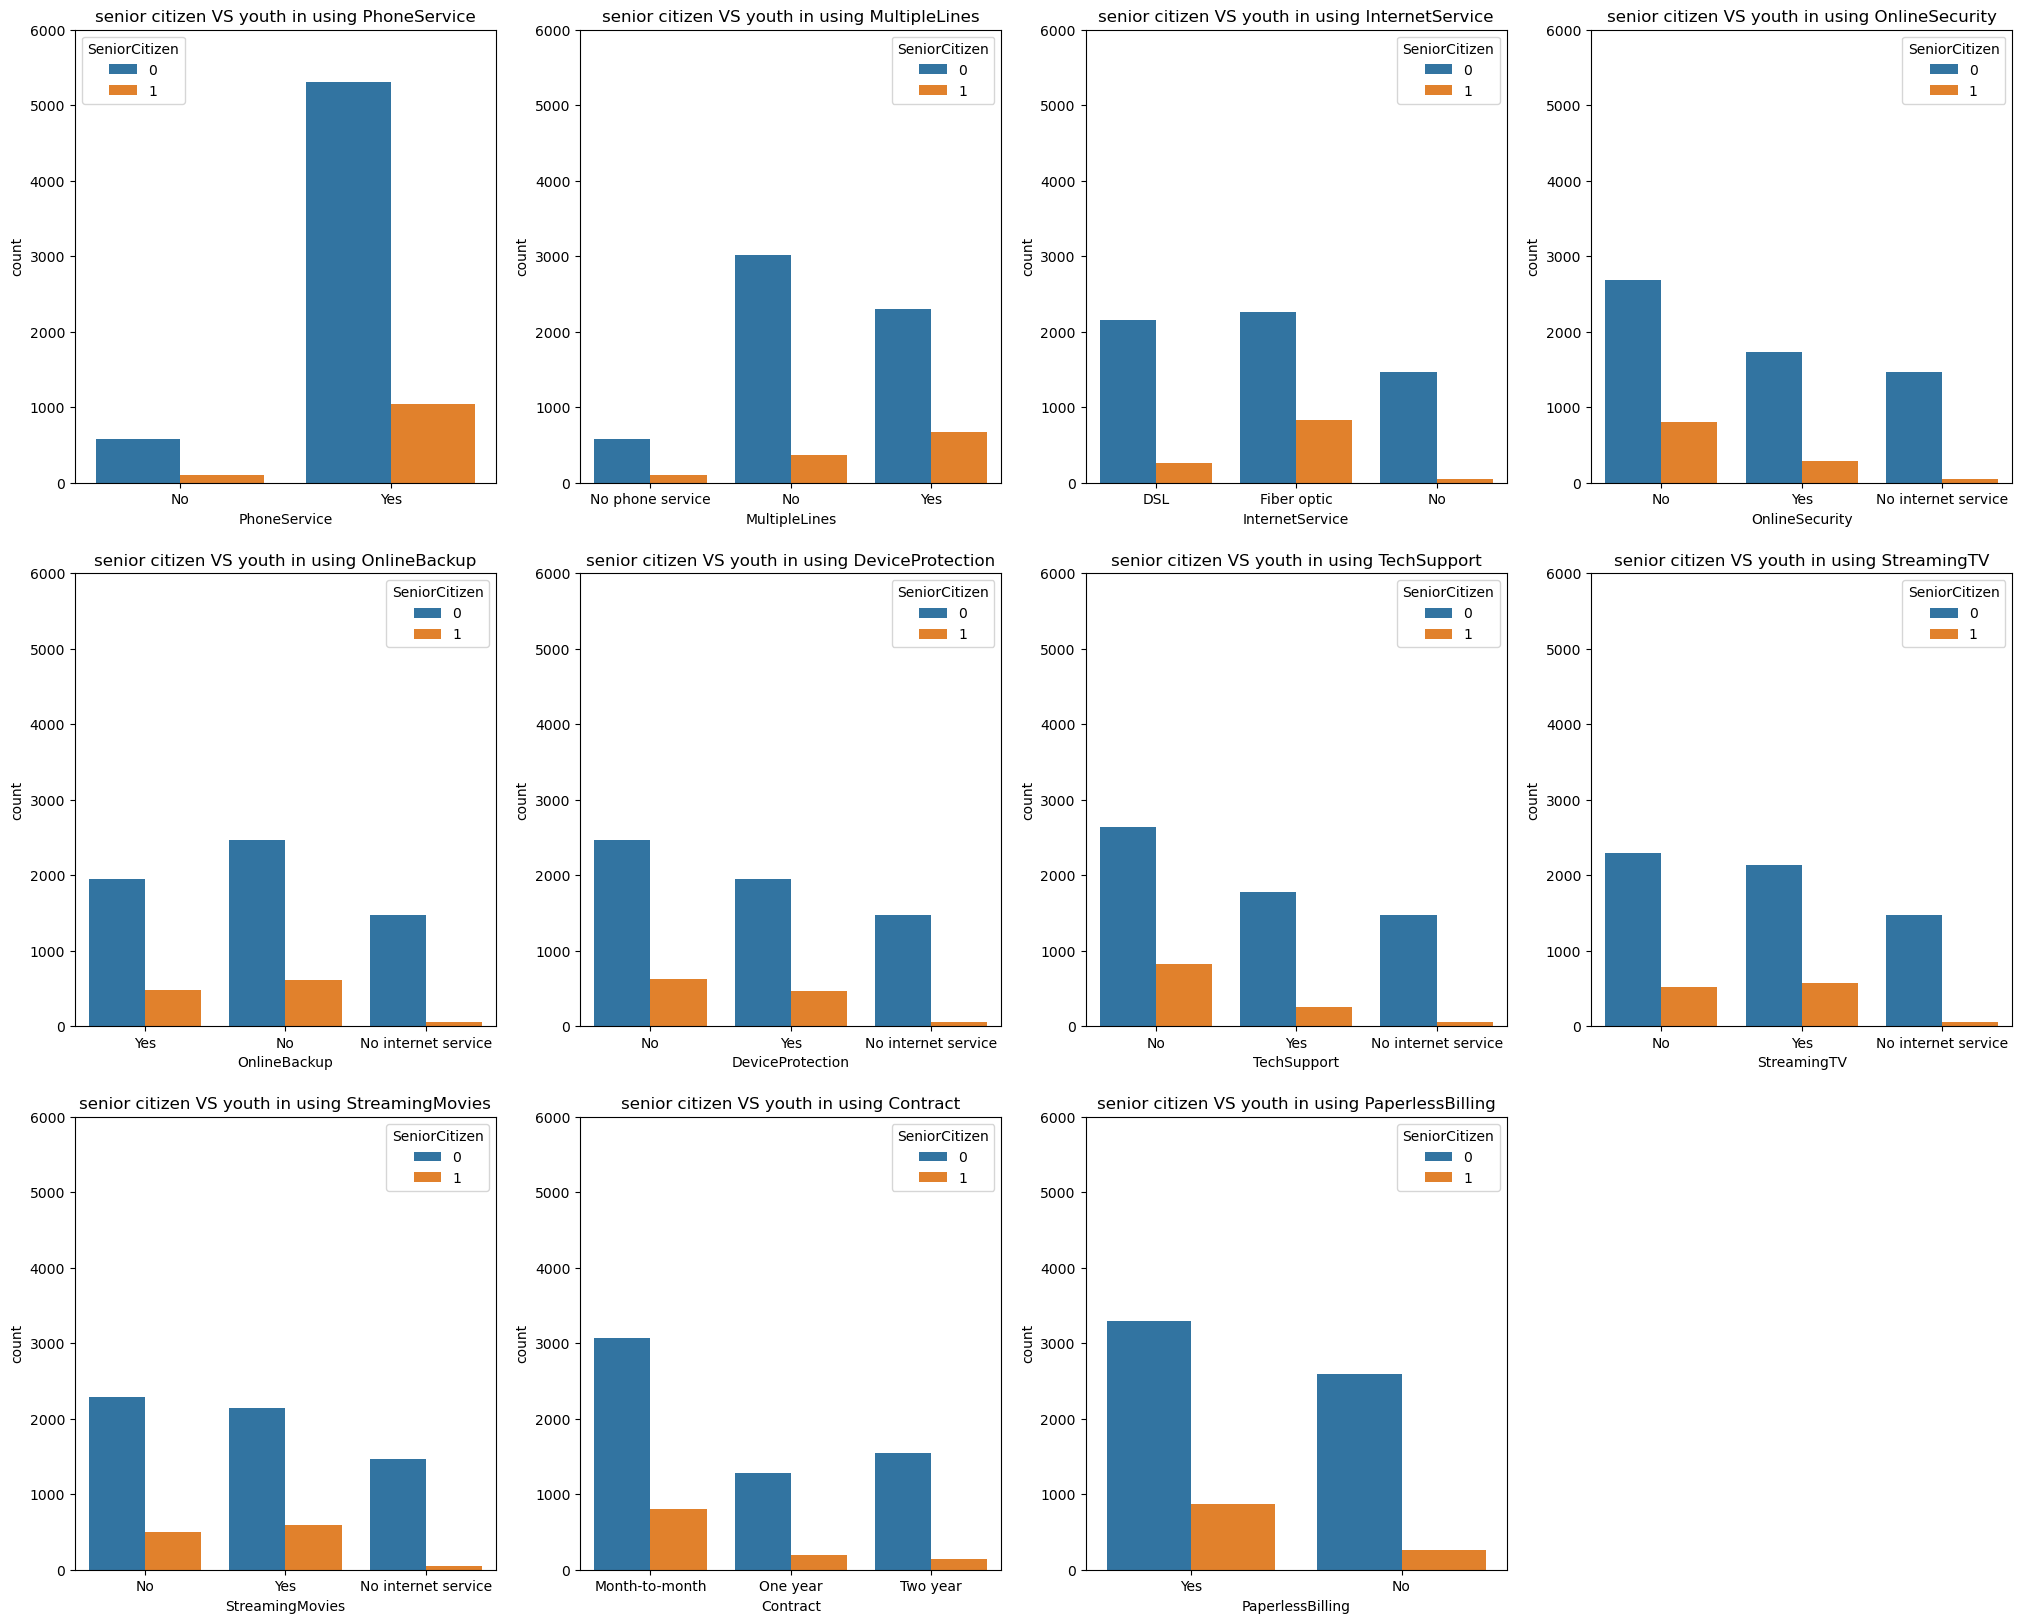

In [169]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(x=feature,hue = telco.SeniorCitizen,data=telco)
    plt.ylim(0,6000)
    plt.title('senior citizen VS youth in using {}'.format(feature))
plt.show()

### The previous plot aims to find out the number of elderly people who use different services and the number of young people who use the same services as well

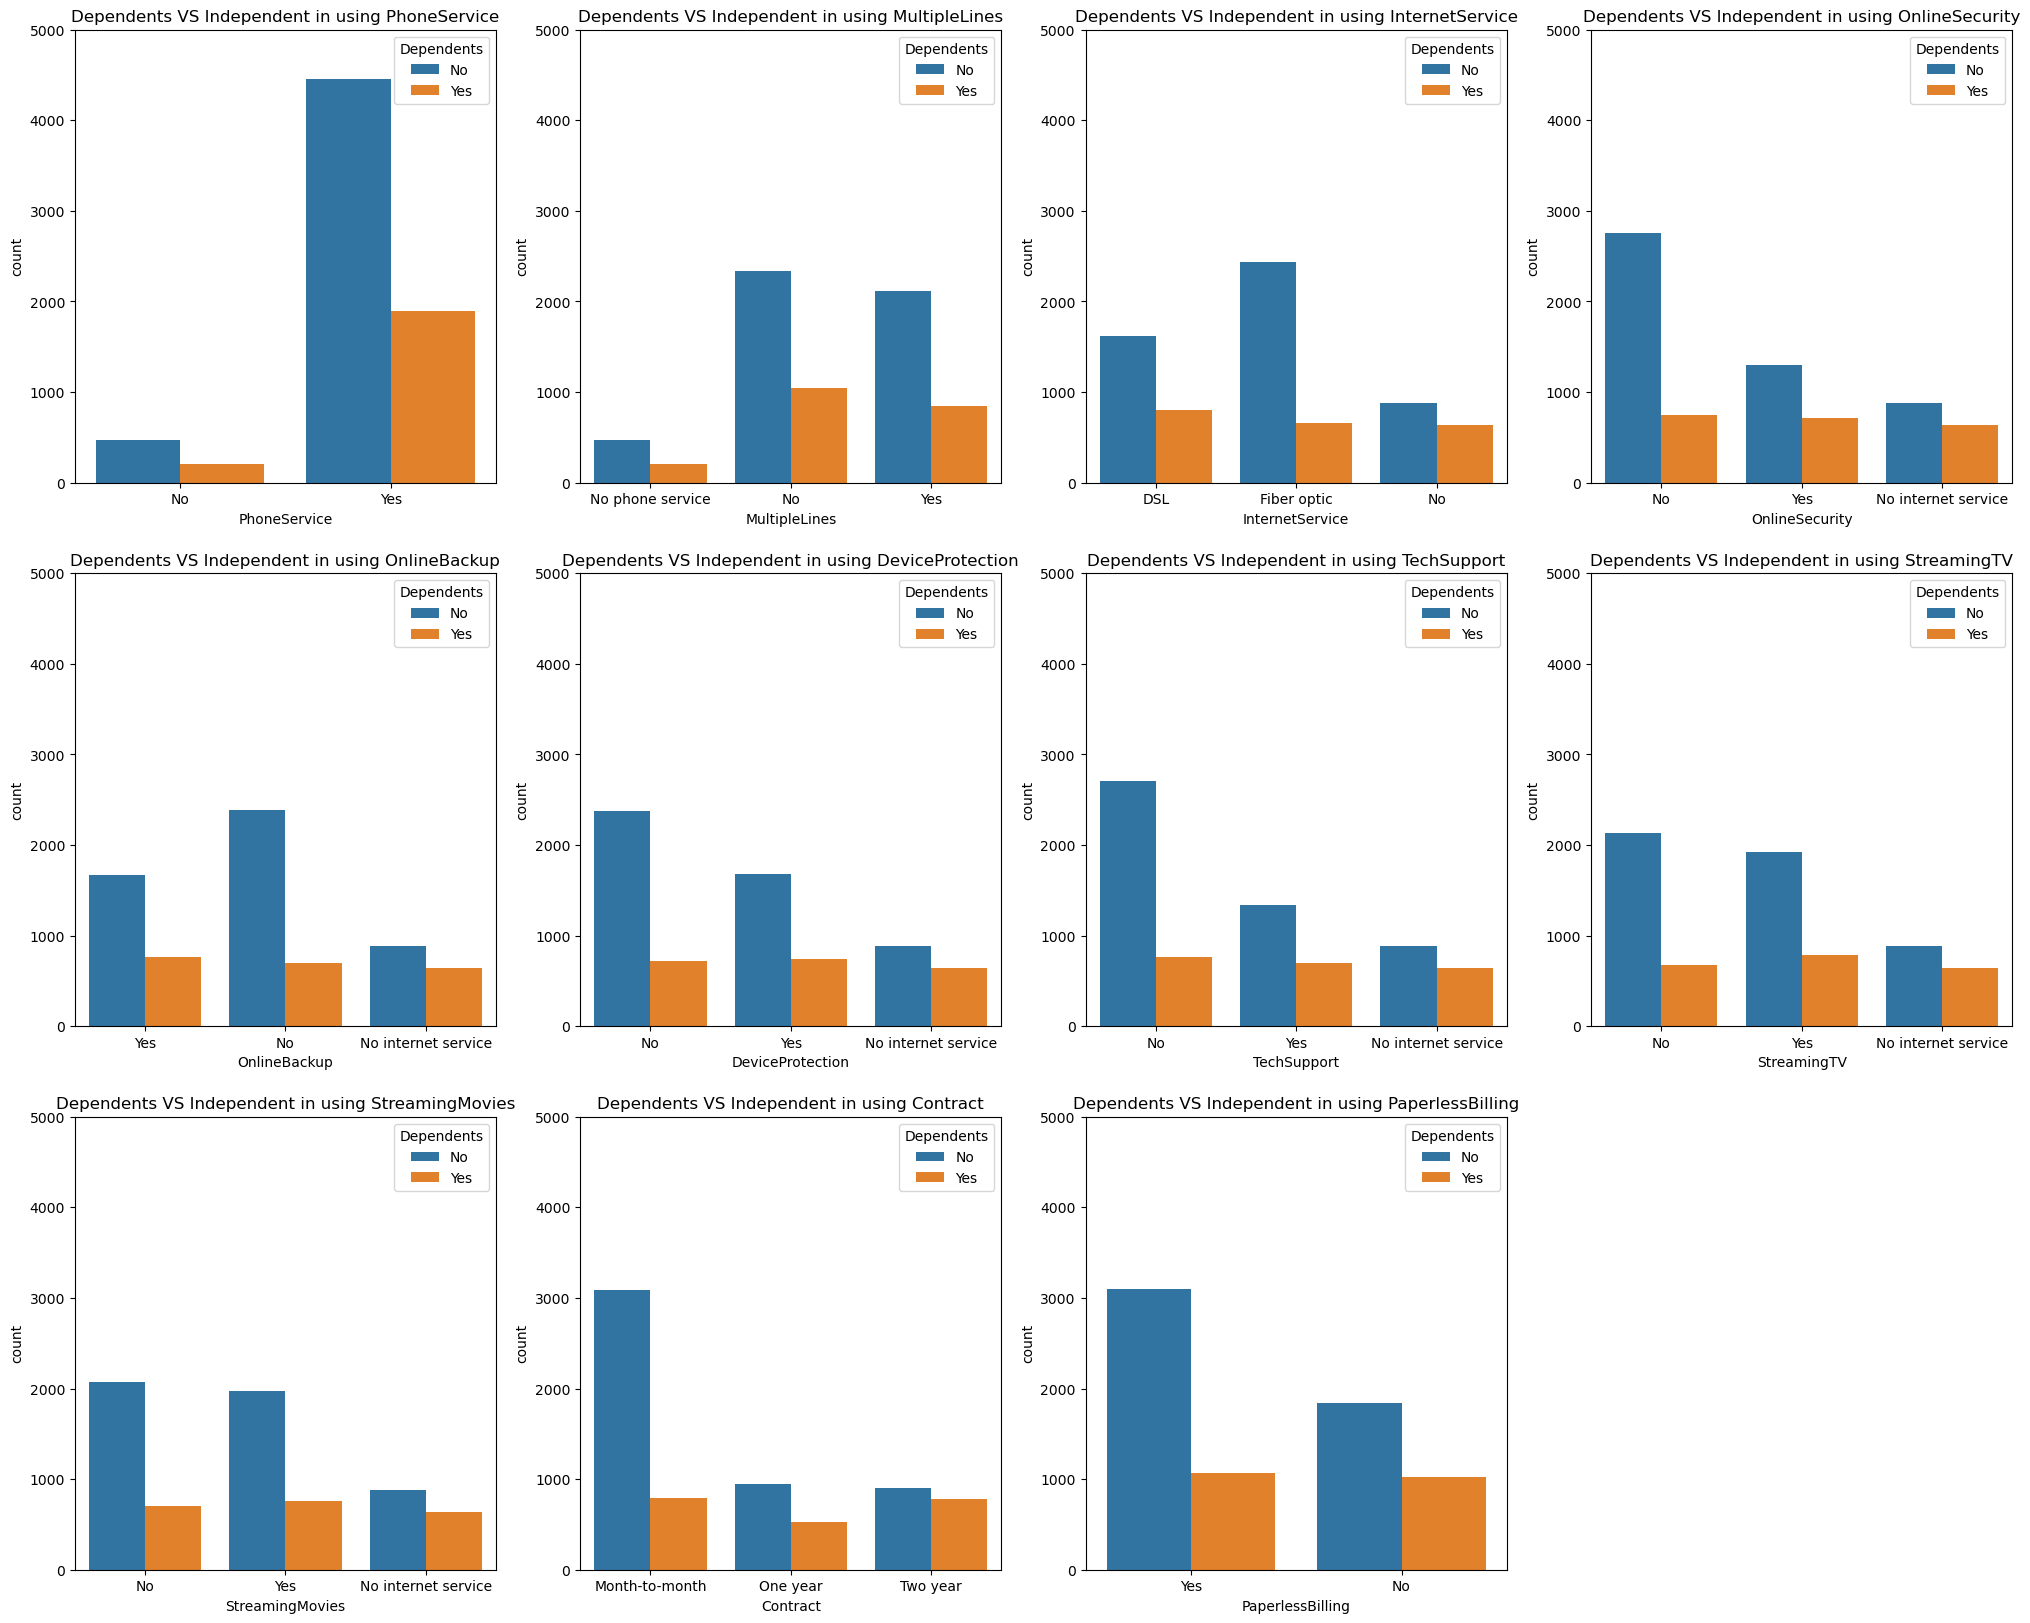

In [171]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(x=feature,hue = telco.Dependents,data=telco)
    plt.ylim(0,5000)
    plt.title('Dependents VS Independent in using {}'.format(feature))
plt.show()

### The previous plot aims to find out the number of dependent people who use different services and the number of independent people who use the same services as well

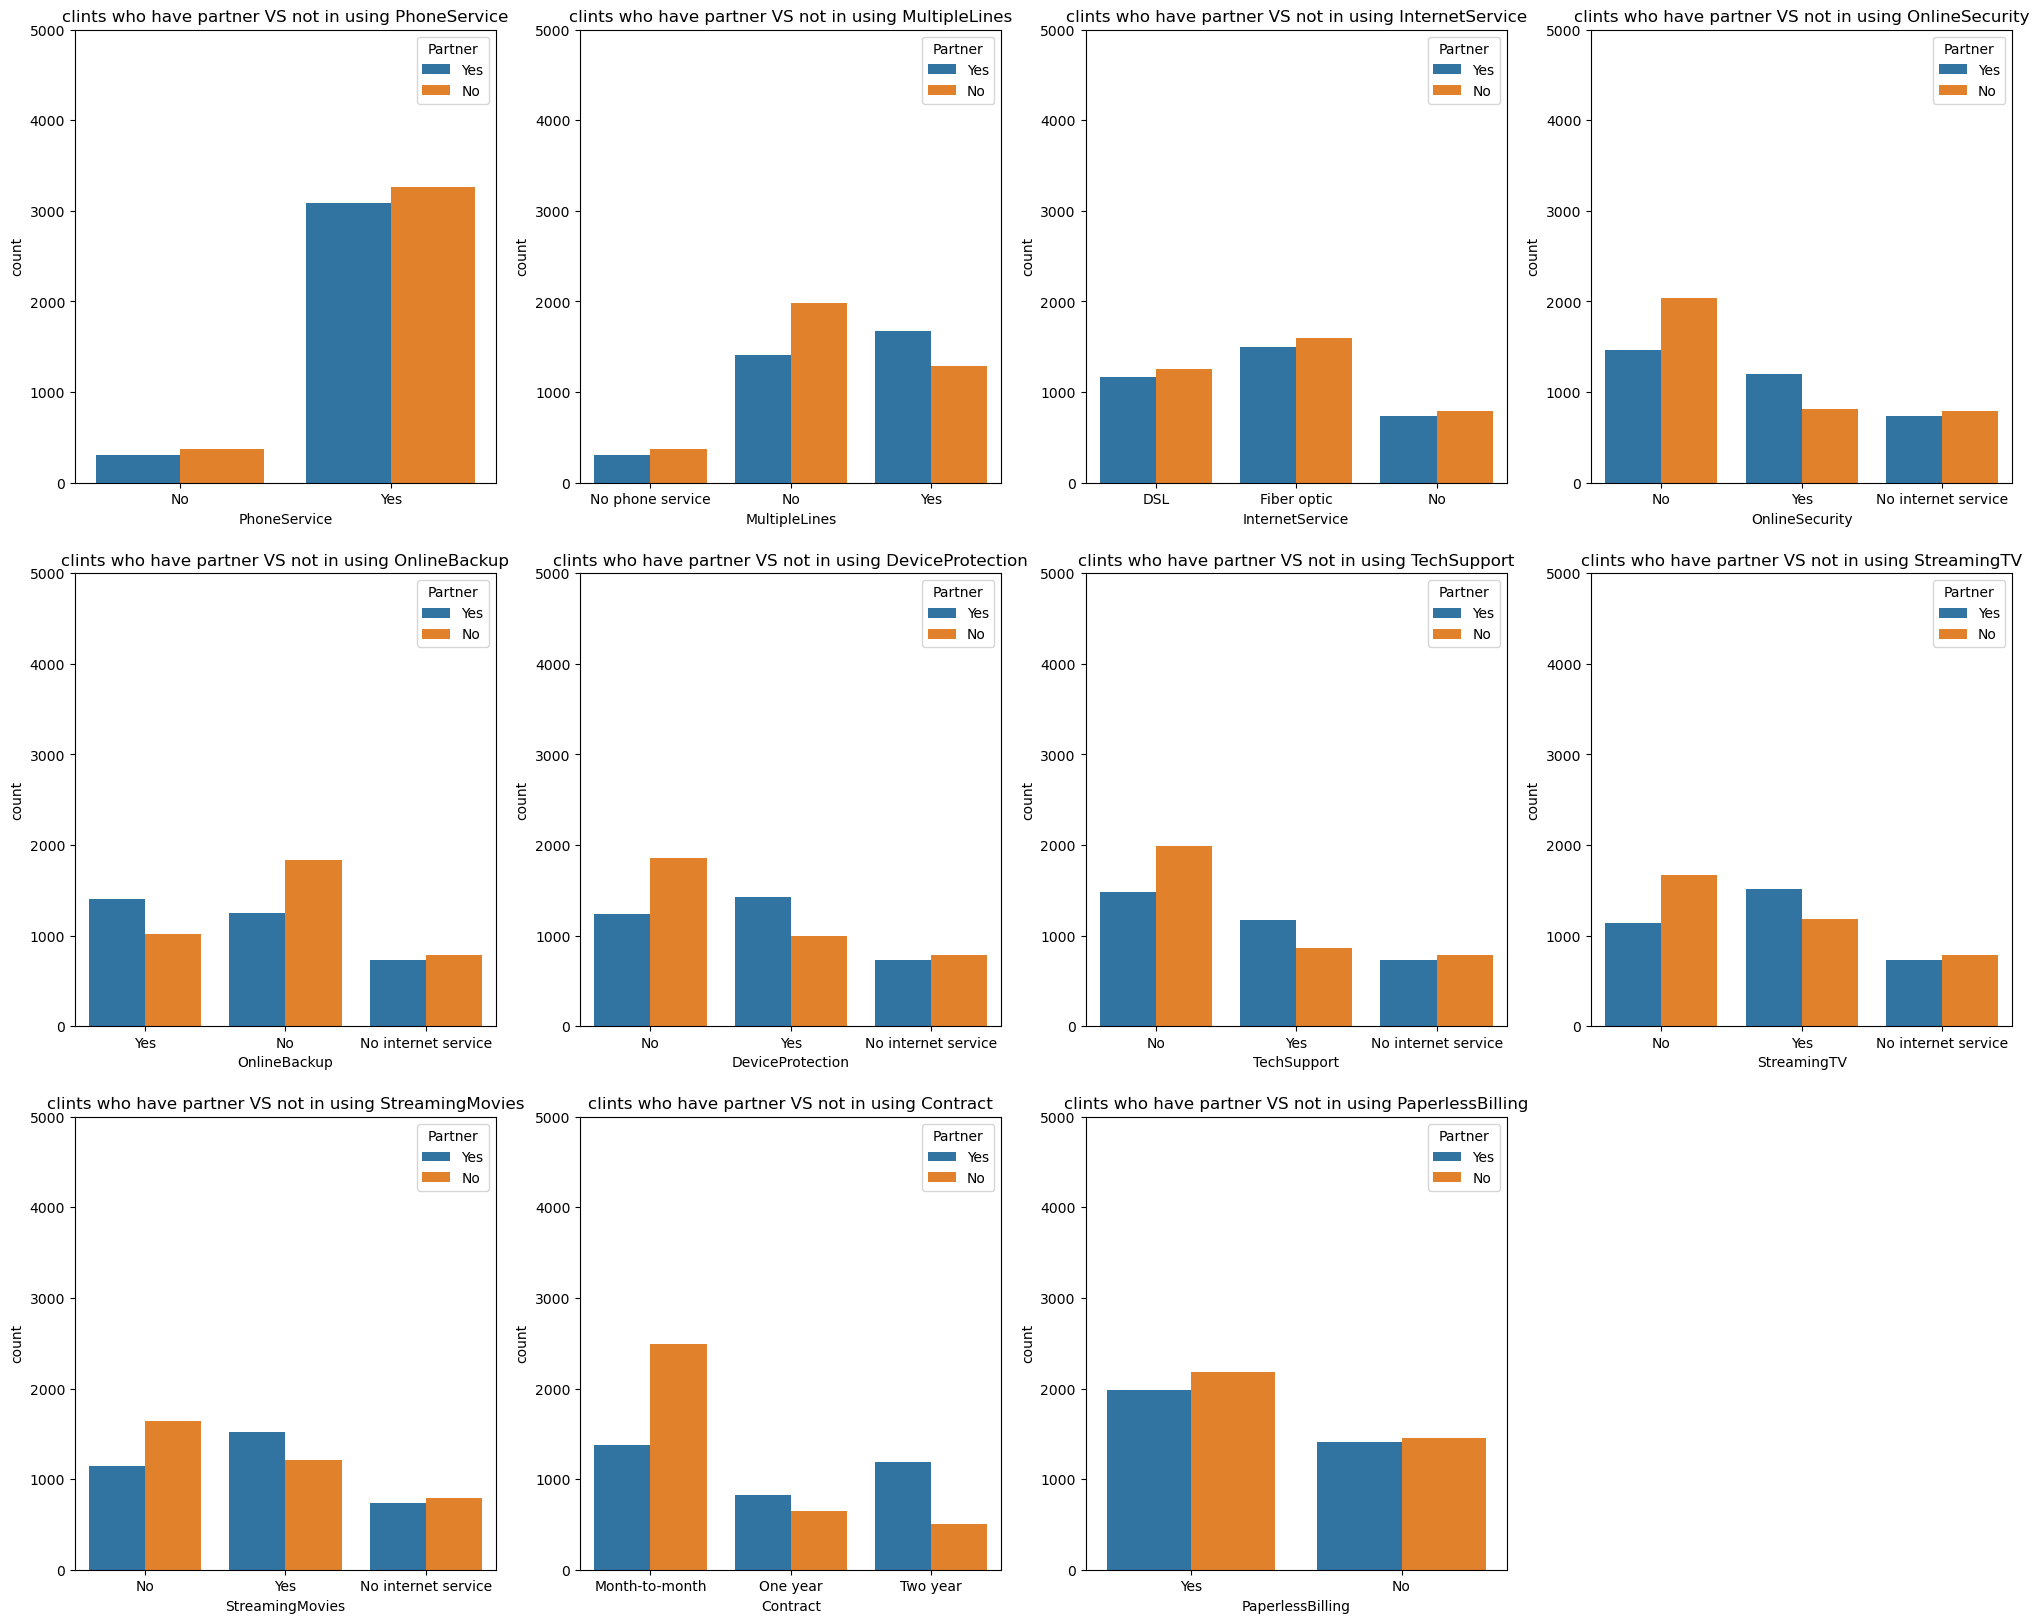

In [172]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(x=feature,hue = telco.Partner,data=telco)
    plt.ylim(0,5000)
    plt.title('clints who have partner VS not in using {}'.format(feature))
plt.show()

### The previous plot aims to find out the number of clients who has partner use different services and the number of clients who don't have partner use the same services as well

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


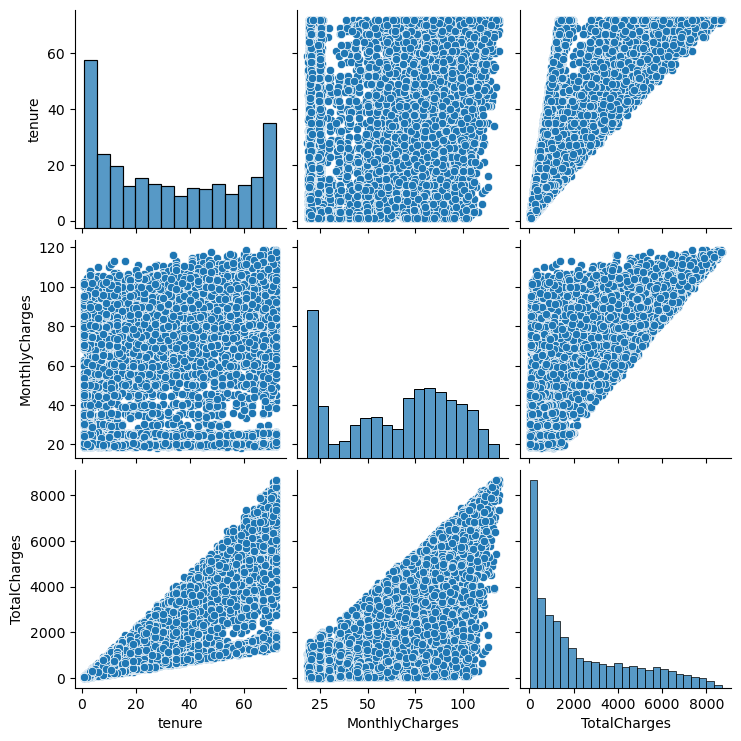

In [173]:
sns.pairplot(num_col)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **there are a big positive correlation between tenure,Monthly and Total charges**


## Multivariate Exploration

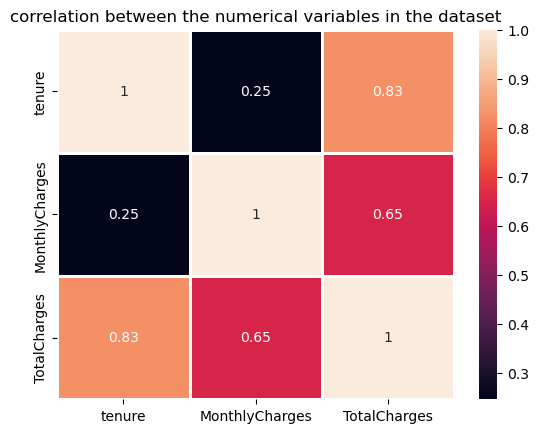

In [174]:
sns.heatmap(num_col.corr(),annot=True,linewidths=2)
plt.title('correlation between the numerical variables in the dataset')
plt.show()

**now we can see how much each feature correlated with the others**

<a id='conclusions'></a>
## Conclusions

## in the end there are some problems the company faces

- 41.7% of senior citizens left the company.
- 33% of customers who don't have a partner left the company.
- 31% of independent customers left the company
- 15.4% of dependent customers  left the company
- 8.7% of customers left the company after the first month
- 19.3% of customers left the company after first 5 months

- A large number of customers using Fiber Optic have left the company
- Clients who do not use online security, many of them leave the company
- Many clients who do not use technical support have left the company
- Customers who pay month to month are the most who leave the company